In [23]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("Data/HateSpeechText.csv",sep=";")
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [6]:
data.shape

(13169, 13)

## Data Analysis

### Perbandingan jumlah tiap label

In [7]:
label_size0 = []
label_size1 = []

for i in data.columns[1:]:
    label_size0.append(len(data[data[i]==0]))
    label_size1.append(len(data[data[i]==1]))

In [8]:
dat_anls = pd.DataFrame({
    'label' : data.columns[1:],
    'negative' : label_size0,
    'positive' : label_size1
})

dat_anls = dat_anls.set_index(['label'], drop=True)

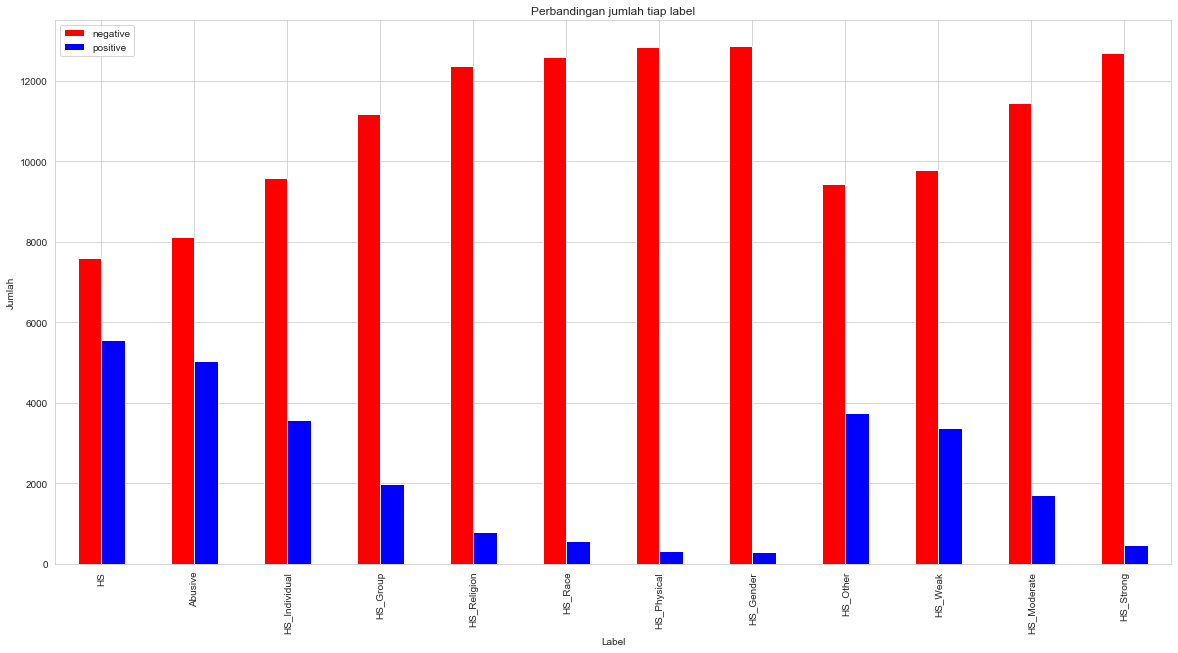

In [9]:
dat_anls.loc[:,['negative','positive']].plot.bar(color=['red','blue'], figsize=(20,10))
plt.title("Perbandingan jumlah tiap label")
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

In [10]:
dat_anls

,negative,positive
label,,
HS,7608,5561
Abusive,8126,5043
HS_Individual,9594,3575
HS_Group,11183,1986
HS_Religion,12376,793
HS_Race,12603,566
HS_Physical,12846,323
HS_Gender,12863,306
HS_Other,9429,3740


### Multiple labels per tweet

Text(0.5, 0, '# of labels')

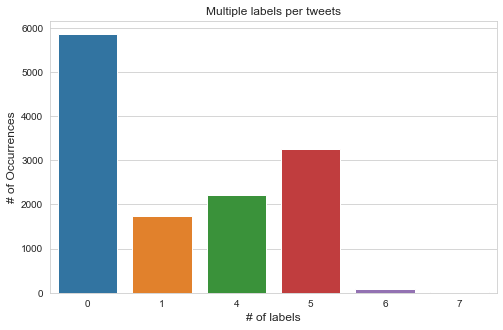

In [11]:
rowsums = data.iloc[:,1:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple labels per tweets")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of labels', fontsize=12)

In [12]:
data.iloc[:,1:].sum(axis=1).value_counts()

0    5860
5    3251
4    2208
1    1748
6      95
7       7
dtype: int64

### Distribusi Panjang Karakter Tweet

In [13]:
data_anl = data[["Tweet"]].copy()

In [14]:
data_anl['Tweet_length'] = data_anl['Tweet'].str.len()

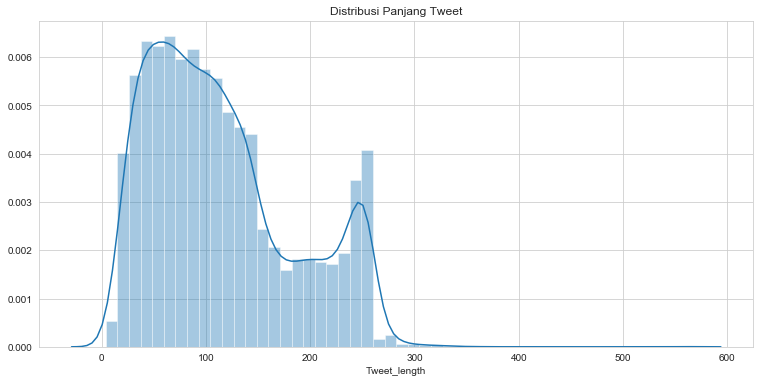

In [15]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl['Tweet_length']).set_title('Distribusi Panjang Tweet');

In [16]:
data_anl['Tweet_length'].describe()

count    13169.000000
mean       114.202749
std         69.075620
min          4.000000
25%         59.000000
50%        100.000000
75%        152.000000
max        561.000000
Name: Tweet_length, dtype: float64

### Distribusi Panjang Kata Tweet

In [17]:
data_anl['word_count'] = data_anl['Tweet'].apply(lambda x: len(str(x).split()))

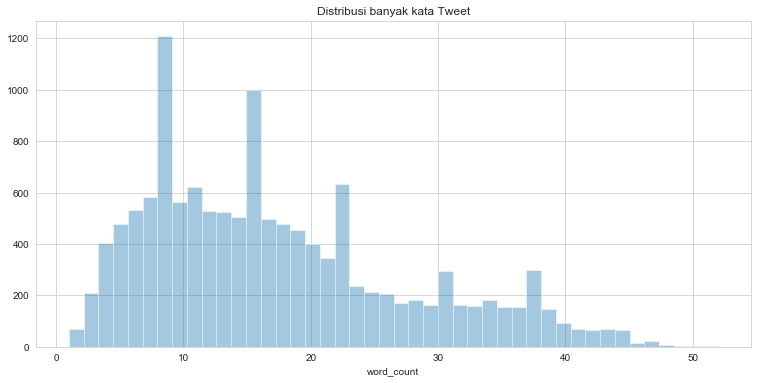

In [18]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl['word_count'],kde=False).set_title('Distribusi banyak kata Tweet');

In [19]:
data_anl['word_count'].describe()

count    13169.000000
mean        17.282102
std         10.231973
min          1.000000
25%          9.000000
50%         15.000000
75%         23.000000
max         52.000000
Name: word_count, dtype: float64

### Sampel Tweet

In [20]:
data['Tweet'].iloc[0]

"- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'"

### Top 20 Words

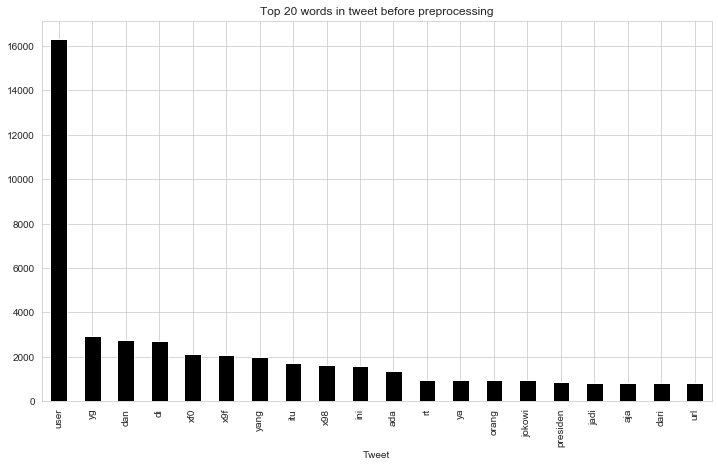

In [21]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data_anl['Tweet'], 20)
# for word, freq in common_words:
#     print(word, freq)
topWord = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
topWord.groupby('Tweet').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 words in tweet before preprocessing', figsize=(12,7))


### Top 20 Bigram

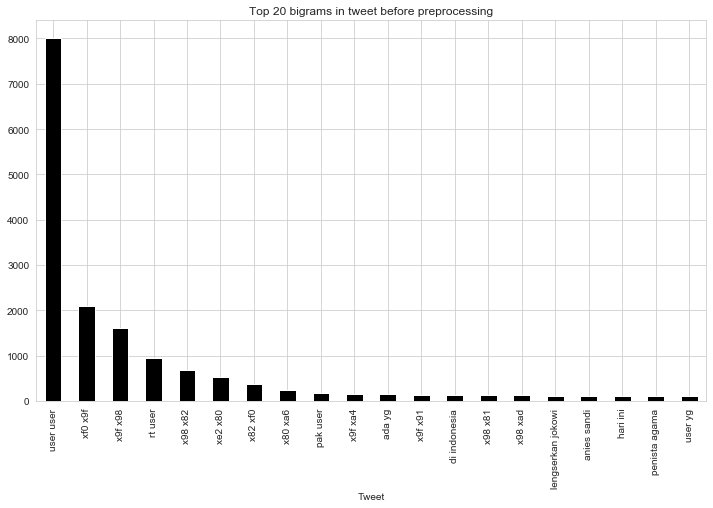

In [22]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data_anl['Tweet'], 20)
# for word, freq in common_words:
#     print(word, freq)
topbigram = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])
topbigram.groupby('Tweet').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 bigrams in tweet before preprocessing', figsize=(12,7))


## Store Train and Test Set

In [24]:
X = data[['Tweet']]
y = data.drop(['Tweet'],axis = 1).values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

In [28]:
data_train = X_train.copy()
data_train = data_train.reset_index(drop=True).join(pd.DataFrame(data=y_train, columns = data.columns[1:]))
data_train.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,Lengserkan kenapa om.. dpr kan punya kuasa rak...,1,0,1,0,0,0,0,0,1,0,0,1
1,Presiden Joko Widodo (Jokowi) meminta agar Sis...,0,0,0,0,0,0,0,0,0,0,0,0
2,luggage semua harga yahudi \xf0\x9f\x98\xb9',0,0,0,0,0,0,0,0,0,0,0,0
3,Pegimana ini? ð?¤­ RT USER: Menarik!; ; Meskip...,0,0,0,0,0,0,0,0,0,0,0,0
4,makanya drpd pusing cari yg sdh hilang..mendin...,1,0,1,0,0,0,0,0,1,1,0,0


In [29]:
data_test = X_test.copy()
data_test = data_test.reset_index(drop=True).join(pd.DataFrame(data=y_test, columns = data.columns[1:]))
data_test.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,USER USER Ewe ewe berhadiah',0,1,0,0,0,0,0,0,0,0,0,0
1,"Pada tahun 2045, Indonesia diprediksikan mjd n...",0,0,0,0,0,0,0,0,0,0,0,0
2,"Ini baru ""BERITA""; ; PPP TOLAK PENCAPRESAN JOK...",0,0,0,0,0,0,0,0,0,0,0,0
3,"USER, Resident Country Director USER: Pertumbu...",0,0,0,0,0,0,0,0,0,0,0,0
4,UMAT HINDU SAMPAIKAN SELAMAT ULANG TAHUN KEPAD...,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
data_train.to_csv("Data/data_train.csv", index=False, sep=";")
data_test.to_csv("Data/data_test.csv", index=False, sep=";")

## Data Preprocessing

### Text Cleaning and Preparation

1. menghilangkan simbol khusus seperti \r, \n, ", url, dan byte code

In [20]:
data['Tweet_Parsed_1'] = data['Tweet'].str.replace("\\\\r", " ")
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\\\\n", " ")
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\n", " ")
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\r", " ")
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("    ", " ")

In [21]:
#remove URL
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ")

In [22]:
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace('"', '')

In [23]:
data['Tweet_Parsed_1'] = data['Tweet_Parsed_1'].str.replace("\\\\x[a-zA-z0-9][a-zA-z0-9]","")

In [24]:
data['Tweet_Parsed_1'].loc[37]

'ajakan menolak berita hoax dan sukseskan pilkada di wilayah kota keidri:'

2. mengubah menjadi lower case

In [25]:
data['Tweet_Parsed_2'] = data['Tweet_Parsed_1'].str.lower()

3. Hapus simbol dan tanda baca

In [26]:
# punctuation_signs = list("?:!.,;@#$%^&*()-+=_{}[]\|/><~`1234567890")
data['Tweet_Parsed_3'] = data['Tweet_Parsed_2']
data['Tweet_Parsed_3'] = data['Tweet_Parsed_3'].str.replace('[^a-zA-Z]+',' ')
# for punct_sign in punctuation_signs:
#     data['Tweet_Parsed_3'] = data['Tweet_Parsed_3'].str.replace(punct_sign, ' ')

In [27]:
data['Tweet_Parsed_3'].loc[47]

'user user user user kata sembahyang mengadopsi tradisi lokal pada masa kerjaan hindu istilahsembahyangpun lahir dari tradisi ritusmenyembahhyang yang tunggal sama denganshalat menyembah all'

4. Normalisasi Kata

In [28]:
kamus_normal = pd.read_csv("Data/new_kamusalay.csv",encoding='latin-1',header=None,names=["non-standard word","standard word"])
kamus_normal.head()

,non-standard word,standard word
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [29]:
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

In [30]:
nonstdword

['anakjakartaasikasik',
 'pakcikdahtua',
 'pakcikmudalagi',
 't3tapjokowi',
 '3x',
 'aamiin',
 'aamiinn',
 'aamin',
 'aammiin',
 'abis',
 'abisin',
 'acau',
 'achok',
 'ad',
 'adek',
 'adl',
 'adlah',
 'adlh',
 'ado',
 'aduhh',
 'aer',
 'afdol',
 'agamaataualqur',
 'agm',
 'agma',
 'ahaha',
 'ahahaha',
 'ahehehehe',
 'ahir',
 'ahirnya',
 'ahk',
 'ahlamdulillah',
 'ahli2',
 'ahlusunnah',
 'ahmaddani',
 'aho',
 'ahoax',
 'ahoaxx',
 'ahog',
 'ahokataudjarot',
 'ahokbebanijokowi',
 'ahokbtp',
 'ahokditolakwarga',
 'ahokdjarot',
 'ahokdjarotterbukti',
 'ahokers',
 'ahokfighter',
 'ahokforpresident',
 'ahokisthebest',
 'ahokjarot',
 'ahokk',
 'ahokmasukbui',
 'ahokmeskipun',
 'ahokpositifjadi',
 'ahoksatuputaran',
 'ahoksemangat',
 'ahoktersangka',
 'ahokterzhalimi',
 'ahoktetap',
 'ahoktidaksendiri',
 'ahokUSER',
 'ahook',
 'ahox',
 'aing',
 'airmata',
 'aiskrim',
 'aj',
 'aja',
 'ajaa',
 'ajah',
 'ajalah',
 'aje',
 'ajg',
 'ajh',
 'ajib',
 'ajj',
 'ak',
 'akalakalan',
 'akalakaln',
 'akank

In [31]:
stdword

['anak jakarta asyik asyik',
 'pak cik sudah tua',
 'pak cik muda lagi',
 'tetap jokowi',
 'tiga kali',
 'amin',
 'amin',
 'amin',
 'amin',
 'habis',
 'habiskan',
 'kacau',
 'ahok',
 'ada',
 'adik',
 'adalah',
 'adalah',
 'adalah',
 'ada',
 'aduh',
 'air',
 'afdal',
 'agama alquran',
 'agama',
 'agama',
 'haha',
 'haha',
 'hehe',
 'akhir',
 'akhirnya',
 'ahok',
 'alhamdulillah',
 'para ahli',
 'ahlus sunah',
 'ahmad dhani',
 'ahok',
 'ahok',
 'ahok',
 'ahok',
 'ahok djarot',
 'ahok beban jokowi',
 'ahok basuki tjahaja purnama',
 'ahok ditolak warga',
 'ahok djarot',
 'ahok djarot terbukti',
 'ahoker',
 'ahok pejuang',
 'ahok for presiden',
 'ahok terbaik',
 'ahok djarot',
 'ahok',
 'ahok masuk bui',
 'ahok meskipun',
 'ahok positif jadi',
 'ahok satu putaran',
 'ahok semangat',
 'ahok tersangka',
 'ahok terzalimi',
 'ahok tetap',
 'ahok tidak sendiri',
 'ahok',
 'ahok',
 'ahok',
 'aku',
 'air mata',
 'es krim',
 'saja',
 'saja',
 'saja',
 'saja',
 'sajalah',
 'saja',
 'anjing',
 'saja'

In [32]:
def normalize_text(text, stdword_, nonstdword_):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

In [33]:
data['Tweet_Parsed_4'] = data['Tweet_Parsed_3']

data['Tweet_Parsed_4'] = data['Tweet_Parsed_4'].map(lambda com : normalize_text(com,stdword,nonstdword))

5. Menghilangkan imbuhan (*stemming*)

In [174]:
wordnet_lemmatizer = WordNetLemmatizer()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [148]:
text = data['Tweet_Parsed_4'].values
stemmed_text = []

for i in text:
    text_split = i.split(" ")
    stemmed_list = []
    for j in text_split:
        stemmer_en.
        stemmed_list.append(stemmer.stem(j))
    stemmed = ' '.join(map(str,stemmed_list))
    stemmed_text.append(stemmed)

data['Tweet_Parsed_5'] = stemmed_text

6. Remove Stopword

In [149]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [182]:
stop_words = list(stopwords.words('indonesian'))
stop_words = stop_words+["rt","retweet","nih","nya","sih","ya","url"]

In [183]:
stop_words[1:10]

['adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [184]:
len(stop_words)

765

In [185]:
data['Tweet_Parsed_6'] = data['Tweet_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    data['Tweet_Parsed_6'] = data['Tweet_Parsed_6'].str.replace(regex_stopword, '')

7. clean space

In [186]:
def clean_space(text):
    text_split = text.split(' ')
    text_clean = [i for i in text_split if i != '']
    text_fix = ' '.join(map(str,text_clean))
    return text_fix

In [187]:
data['Tweet_Parsed_7'] = data['Tweet_Parsed_6']

data['Tweet_Parsed_7'] = data['Tweet_Parsed_7'].map(lambda com : clean_space(com))

### Preprocessing Result

In [188]:
idx_length150 = data_anl[data_anl['Tweet_length']==90].index.values[0]

In [189]:
data['Tweet'].loc[idx_length150]

'Mari kita wujudkan Pilkada Kota Bengkulu 2018 aman dan damai.; .; .; coki_adem86 98heruâ?¦'

In [190]:
data['Tweet_Parsed_1'].loc[idx_length150]

'Mari kita wujudkan Pilkada Kota Bengkulu 2018 aman dan damai.; .; .; coki_adem86 98heruâ?¦'

In [191]:
data['Tweet_Parsed_2'].loc[idx_length150]

'mari kita wujudkan pilkada kota bengkulu 2018 aman dan damai.; .; .; coki_adem86 98heruâ?¦'

In [192]:
data['Tweet_Parsed_3'].loc[idx_length150]

'mari kita wujudkan pilkada kota bengkulu aman dan damai coki adem heru '

In [193]:
data['Tweet_Parsed_4'].loc[idx_length150]

'mari kita wujudkan pilihan kepala daerah kota bengkulu aman dan damai coki adem heru '

In [194]:
data['Tweet_Parsed_5'].loc[idx_length150]

'mari kita wujud pilih kepala daerah kota bengkulu aman dan damai cok adem heru '

In [195]:
data['Tweet_Parsed_6'].loc[idx_length150]

'mari  wujud pilih kepala daerah kota bengkulu aman  damai cok adem heru '

In [196]:
data['Tweet_Parsed_7'].loc[idx_length150]

'mari wujud pilih kepala daerah kota bengkulu aman damai cok adem heru'

## Data Fix

In [197]:
data_fix = data.drop(['Tweet_Parsed_1', 'Tweet_Parsed_2','Tweet_Parsed_3','Tweet_Parsed_4','Tweet_Parsed_5','Tweet_Parsed_6'],axis=1)

data_fix = data_fix.rename(columns={'Tweet_Parsed_7': 'Tweet_Parsed'})

In [198]:
data_fix.head(10)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,cowok usaha lacak perhati gue lantas remeh per...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,telat tau edan sarap gue gaul cigax jifla cal ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang pikir percaya tuhan jatuh kali kali kad...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,ku tau mata sipit lihat
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir lihat dongok dungu haha
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,bani taplak kawan kawan
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0,deklarasi pilih kepala daerah aman anti hoaks ...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,gue selesai re watch aldnoah zero kampret kara...
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0,admin belanja port nak makan ais kepal milo ai...
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0,enak ngewe


## Missing Values

In [199]:
pd.isnull(data_fix).sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
Tweet_Parsed     0
dtype: int64

In [200]:
data_fix.loc[data_fix['Tweet_Parsed'] == '', ['Tweet_Parsed']] = " "

## Analysis Data After Preprocessed

### Empty String

In [201]:
data_fix[data_fix['Tweet_Parsed'] == ' '].count()

Tweet            57
HS               57
Abusive          57
HS_Individual    57
HS_Group         57
HS_Religion      57
HS_Race          57
HS_Physical      57
HS_Gender        57
HS_Other         57
HS_Weak          57
HS_Moderate      57
HS_Strong        57
Tweet_Parsed     57
dtype: int64

### Distribusi Panjang Karakter Tweet

In [202]:
data_anl_ = data_fix[["Tweet_Parsed"]].copy()

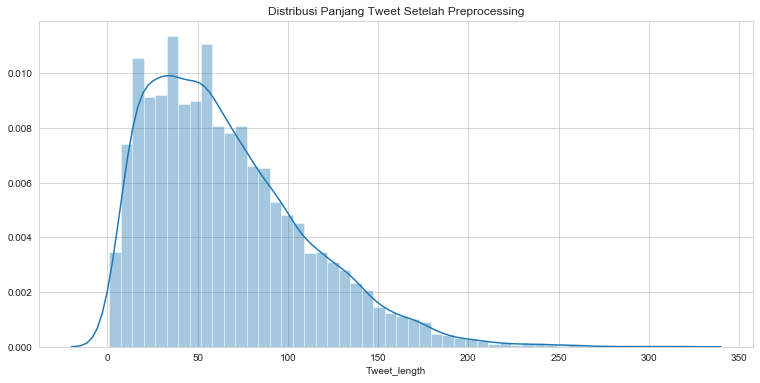

In [203]:
data_anl_['Tweet_length'] = data_anl_['Tweet_Parsed'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl_['Tweet_length']).set_title('Distribusi Panjang Tweet Setelah Preprocessing');

In [204]:
data_anl_['Tweet_length'].describe()

count    13169.000000
mean        66.115119
std         43.803715
min          1.000000
25%         32.000000
50%         57.000000
75%         91.000000
max        319.000000
Name: Tweet_length, dtype: float64

### Distribusi Banyak Kata Per Tweet

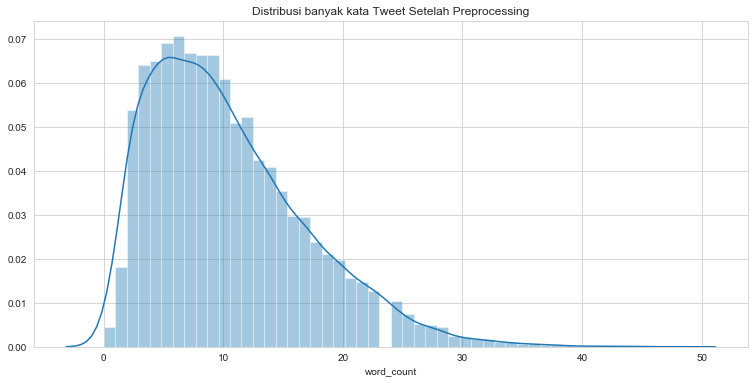

In [205]:
data_anl_['word_count'] = data_anl_['Tweet_Parsed'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12.8,6))
sns.distplot(data_anl_['word_count']).set_title('Distribusi banyak kata Tweet Setelah Preprocessing');

In [206]:
data_anl_['word_count'].describe()

count    13169.000000
mean        10.385906
std          6.614199
min          0.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         48.000000
Name: word_count, dtype: float64

### Top 20 Word After Preprocessing

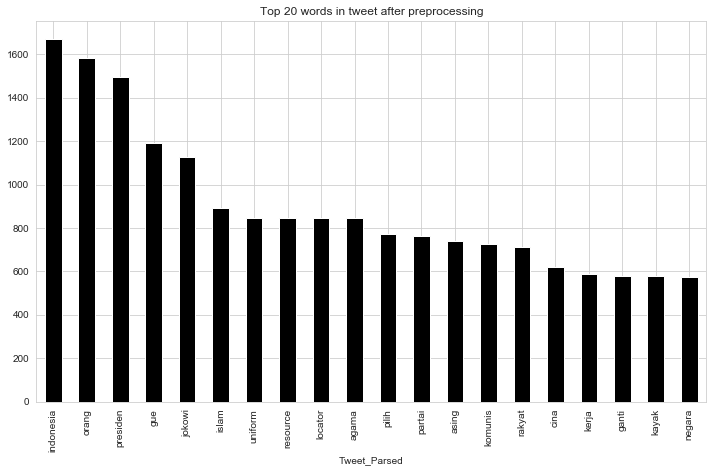

In [207]:
common_words_ = get_top_n_words(data_anl_['Tweet_Parsed'], 20)
# for word, freq in common_words:
#     print(word, freq)
topWord_ = pd.DataFrame(common_words_, columns = ['Tweet_Parsed' , 'count'])
topWord_.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 words in tweet after preprocessing', figsize=(12,7))

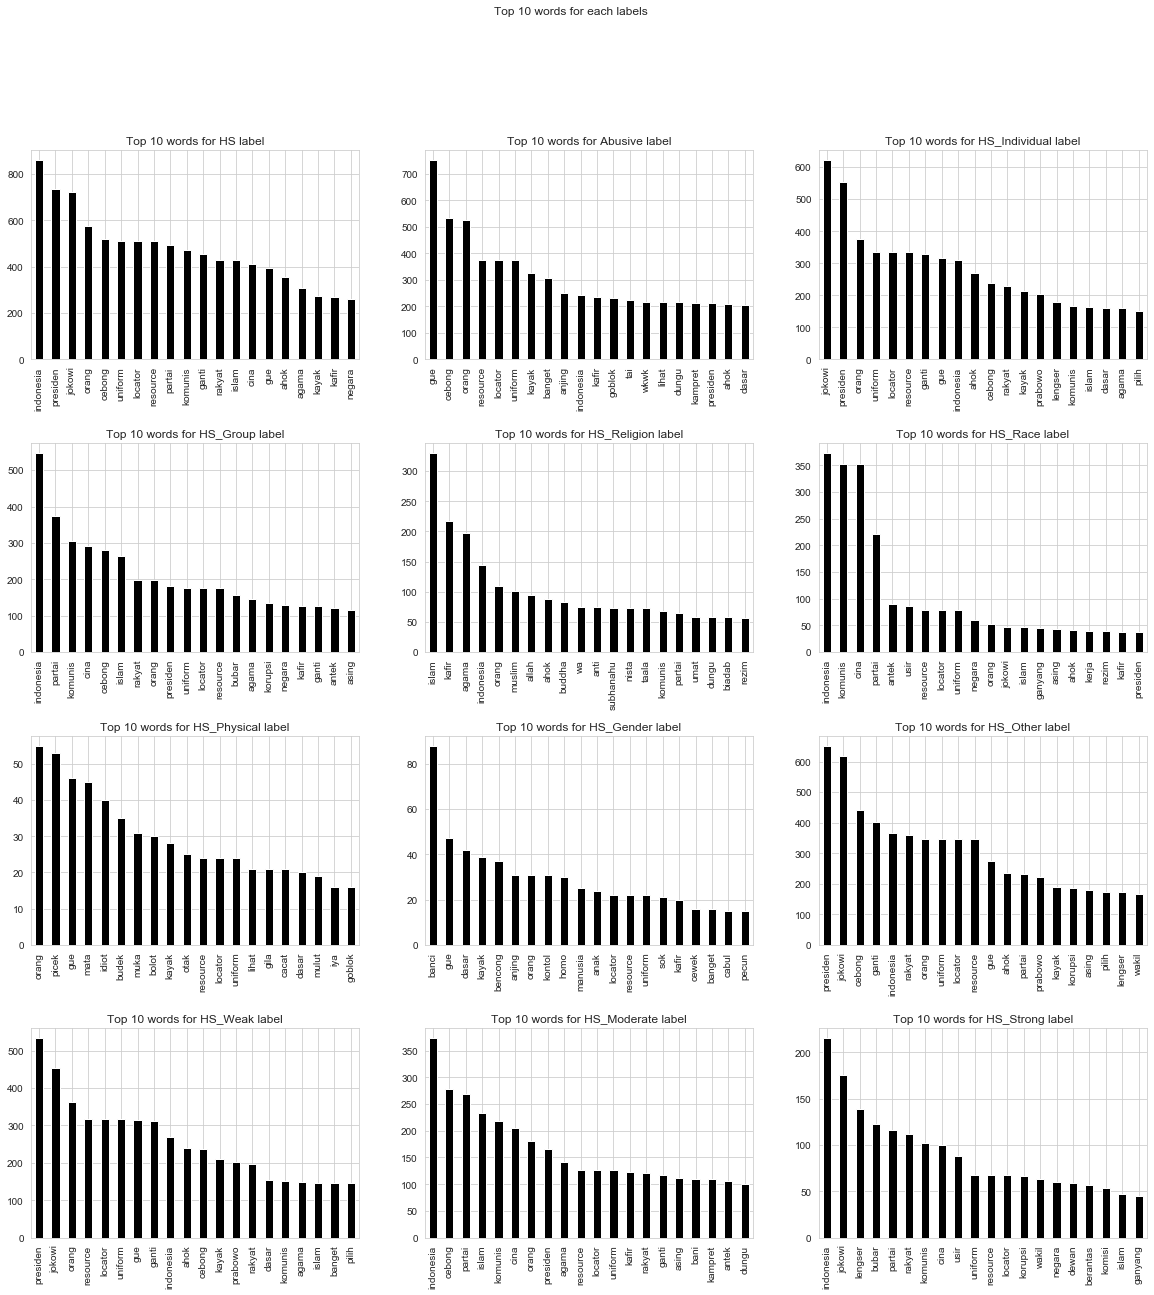

In [208]:
column = data_fix.columns[1:-1]

plt.figure(figsize=(20,20))
plt.suptitle('Top 10 words for each labels')
for i in range (len(column)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    common_words_ = get_top_n_words(data_fix[data_fix[column[i]] == 1]['Tweet_Parsed'], 20)
    # for word, freq in common_words:
    #     print(word, freq)
    topWord_ = pd.DataFrame(common_words_, columns = ['Tweet_Parsed' , 'count'])
    topWord_.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
        kind='bar', y='Count', color='black')
    title='Top 10 words for '+str(column[i])+" label"
    plt.title(title)
    plt.xlabel("")

### Top 20 Bigram After Preprocessing

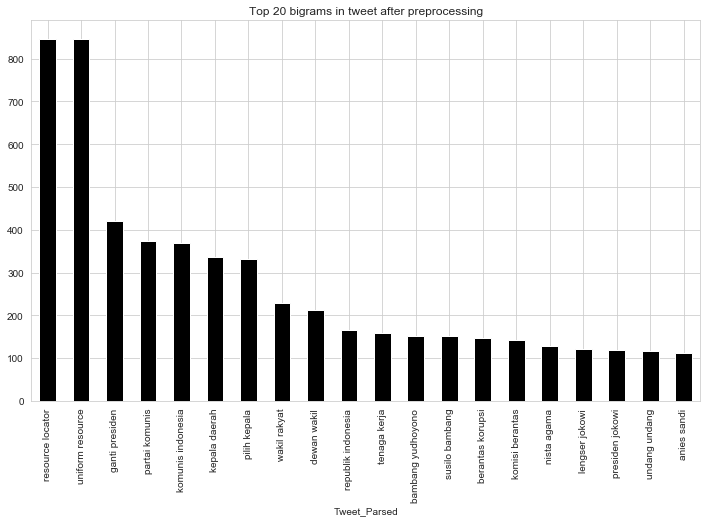

In [209]:
common_words_ = get_top_n_bigram(data_anl_['Tweet_Parsed'], 20)
# for word, freq in common_words:
#     print(word, freq)
topbigram_ = pd.DataFrame(common_words_, columns = ['Tweet_Parsed' , 'count'])
topbigram_.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', y='Count', color='black', title='Top 20 bigrams in tweet after preprocessing', figsize=(12,7))

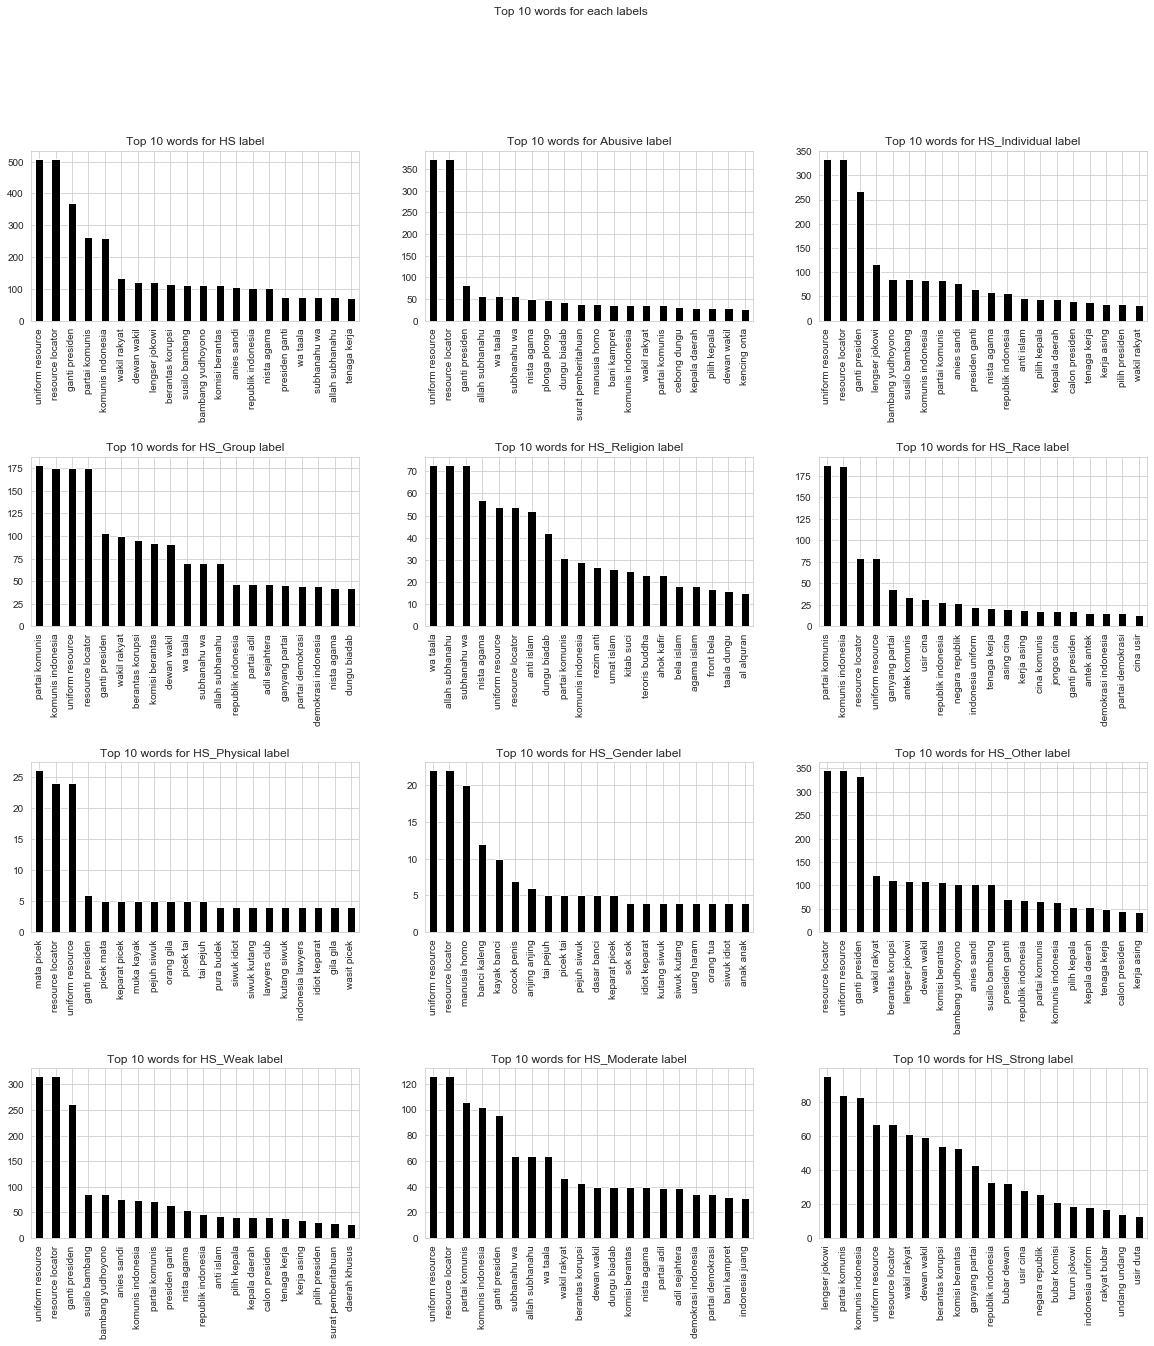

In [210]:
column = data_fix.columns[1:-1]

plt.figure(figsize=(20,20))
plt.suptitle('Top 10 words for each labels')
for i in range (len(column)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.8)
    common_words_ = get_top_n_bigram(data_fix[data_fix[column[i]] == 1]['Tweet_Parsed'], 20)
    # for word, freq in common_words:
    #     print(word, freq)
    topWord_ = pd.DataFrame(common_words_, columns = ['Tweet_Parsed' , 'count'])
    topWord_.groupby('Tweet_Parsed').sum()['count'].sort_values(ascending=False).plot(
        kind='bar', y='Count', color='black')
    title='Top 10 words for '+str(column[i])+" label"
    plt.title(title)
    plt.xlabel("")

## Save Preprocessed Data

In [212]:
data_fix.to_csv('Data/Preprocessed_Data.csv', index = False, sep=";")